In [187]:
from __future__ import print_function
import numpy as np
import pandas as pd
import os

from scipy import stats
import matplotlib
matplotlib.use('qt4agg')

import matplotlib.pyplot as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Importing Data

In [76]:
!wget https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true

--2016-11-08 15:56:38--  https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true
Resolving github.com... 192.30.253.113, 192.30.253.112
Connecting to github.com|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-08 15:56:38--  https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy
Connecting to github.com|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-08 15:56:38--  https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10708880 (10M) [application/

In [81]:
os.system('mv MTA_Fare.npy?raw=true ' + os.getenv('PUIDATA') + '/MTA_Fare.npy')

0

In [148]:
mtaRides = np.load(os.getenv('PUIDATA') + '/' + 'MTA_Fare.npy')

In [149]:
mtaRides

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [150]:
# Converting -1 values to NaNs
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides == (-1)] = 'NaN'

In [151]:
mtaRides

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [153]:
mtaRides.shape
#600 stations, 23 card types, 194 weeks

(600, 23, 194)

In [436]:
# Creating array of provided date range
dates = pd.date_range(start = '5/21/2010', periods = 194, freq = 'W-FRI')
dates.shape

(194,)

In [437]:
# Creating dataframe from above array to merge with data later
dates = pd.DataFrame(dates)
dates.head()

,0
0,2010-05-21
1,2010-05-28
2,2010-06-04
3,2010-06-11
4,2010-06-18


In [438]:
# Creating index column to use in later merge
dates['Index'] = dates.index.values
dates.head()

,0,Index
0,2010-05-21,0
1,2010-05-28,1
2,2010-06-04,2
3,2010-06-11,3
4,2010-06-18,4


# Task 1: Event detection

### Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series. Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [439]:
# First collapse stations to get a 2-way array
mta_cardtype = np.nansum(mtaRides, axis = 0)
print (mta_cardtype.shape)

(23, 194)


In [440]:
# Then collapse card type so it's total rides only as a 1-way array
weeksum = np.nansum(mta_cardtype, axis = 0)
print (weeksum.shape)

(194,)


In [441]:
# Creating a dataframe of the collapsed array
# 194 weeks as rows, total rides (all stations and card types) as column
weeksum = pd.DataFrame(weeksum)
weeksum.head()

,0
0,26720267.0
1,29265971.0
2,29601189.0
3,29387592.0
4,29185768.0


In [442]:
# Adding Index column for merge with dates dataframe
weeksum['Index'] = weeksum.index.values
weeksum.head()

,0,Index
0,26720267.0,0
1,29265971.0,1
2,29601189.0,2
3,29387592.0,3
4,29185768.0,4


In [443]:
# Merging datasets
weeksum_date = pd.merge(dates, weeksum, on = 'Index')
weeksum_date.head()

,0_x,Index,0_y
0,2010-05-21,0,26720267.0
1,2010-05-28,1,29265971.0
2,2010-06-04,2,29601189.0
3,2010-06-11,3,29387592.0
4,2010-06-18,4,29185768.0


In [444]:
# Renaming datasets
weeksum_date.rename(columns = {'0_x' : 'Week', '0_y' : 'Rides'}, inplace = True)
weeksum_date.head()

,Week,Index,Rides
0,2010-05-21,0,26720267.0
1,2010-05-28,1,29265971.0
2,2010-06-04,2,29601189.0
3,2010-06-11,3,29387592.0
4,2010-06-18,4,29185768.0


In [446]:
# Dropping Index column since no longer needed
mtarides_all = weeksum_date[['Week', 'Rides']]
mtarides_all.head()

,Week,Rides
0,2010-05-21,26720267.0
1,2010-05-28,29265971.0
2,2010-06-04,29601189.0
3,2010-06-11,29387592.0
4,2010-06-18,29185768.0


In [447]:
# Summary statistics 
print ("mean rides by week {:.2f}".format(mtarides_all['Rides'].mean()))
print ("stdev rides by week {:.2f}".format(mtarides_all['Rides'].std()))
thresholds = [mtarides_all['Rides'].mean() + 3 * mtarides_all['Rides'].std(), 
              mtarides_all['Rides'].mean() - 3 * mtarides_all['Rides'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(mtarides_all.index))

mean rides by week 29781349.87
stdev rides by week 2991680.90
3-sigma thresholds 38756392.58 20806307.17
earliest datapoint 0


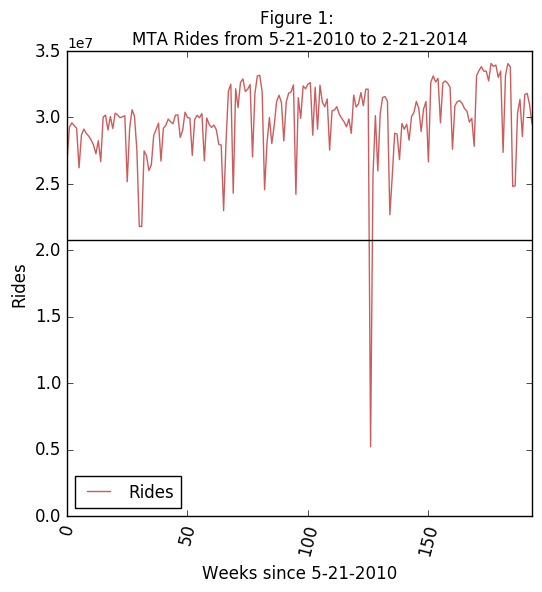

In [480]:
ax = mtarides_all.plot(figsize=(6,6), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='k')
pl.xticks(rotation=75, fontsize=12)
pl.yticks(fontsize=12)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=12, loc = 'lower left')
pl.xlabel("Weeks since 5-21-2010", fontsize=12)
pl.ylabel("Rides", fontsize=12)
pl.title("Figure 1: \nMTA Rides from 5-21-2010 to 2-21-2014")

### Figure 1: 
Plot of MTA rides per week from 5-21-2010 to 2-21-2014. The black line represents the threshold 3-sigma below the mean of the data. It appears 1 week drops below this point, around week 125, where ridership dropped significantly, indicating a prominent event.

In [450]:
# Function to find the week that falls below the 3-sigma threshold
mtarides_all.loc[(mtarides_all.Rides < thresholds[1])]

,Week,Rides
126,2012-10-19,5218686.0


## Task 1 Conclusion:

The prominent event occured the week of 10-19-2012, where the number of MTA rides dropped significantly (below 3 sigma). The mean rides per week in this timeframe were nearly 30 million, whereas the rides this week were just over 5 million. From a quick Google search, I found that Hurricane Sandy hit New York City that week, flooding parts of the city and closing down subway lines and leaving individuals stranded and without power. This, their inability to travel on the trains explains the drop in MTA rides.

Source: https://en.wikipedia.org/wiki/Hurricane_Sandy

# Task 2: Stationary task

Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [452]:
print (mta_cardtype.shape)

(23, 194)


In [453]:
# Finding ride means for the above array
mta_cardtype_mean = np.nanmean(mtaRides, axis = 0)
print (mta_cardtype_mean.shape)

(23, 194)


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [454]:
# Creating a dataframe for the above array
cardtype = pd.DataFrame(mta_cardtype_mean)
cardtype.head()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,24880.119048,27173.229935,27573.708423,27329.751620,27607.099138,24686.356371,26609.648707,27222.422078,26862.019438,26849.367171,...,31679.019523,24556.158009,24240.669546,27846.028139,27872.161987,25828.939394,28440.173160,28548.939394,26999.473002,26969.582251
1,1148.320346,1265.798265,1266.077754,1215.123110,1182.883621,984.213823,1116.782328,1111.281385,1106.246220,1128.658747,...,1695.290672,1290.781385,1120.855292,1438.378788,1609.049676,1327.476190,1544.841991,1504.619048,1447.576674,1470.772727
2,103.465368,111.683297,111.524838,112.447084,110.243534,101.192225,105.523707,107.422078,105.896328,108.803456,...,135.917570,110.000000,97.522678,121.491342,130.516199,111.826840,123.826840,127.209957,122.084233,119.463203
3,403.790043,432.167028,431.248380,424.166307,420.006466,379.369330,406.178879,407.121212,403.503240,411.507559,...,419.236443,356.292208,321.062635,385.032468,418.028078,365.653680,410.311688,398.785714,388.831533,388.231602
4,101.316017,139.594360,123.097192,80.840173,75.883621,101.185745,129.795259,102.681818,69.295896,112.680346,...,122.930586,48.967532,54.645788,146.564935,140.101512,93.995671,103.471861,132.253247,128.293737,101.426407


In [455]:
#Transposing so rows become dates along the side
cardtype = pd.DataFrame.transpose(cardtype)
cardtype.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,24880.119048,1148.320346,103.465368,403.790043,101.316017,8003.123377,18510.686147,21.781385,721.205628,1108.294372,...,266.523810,1710.194805,129.456710,61.084416,0.00000,269.898268,45.584416,13.264069,0.774892,NaN
1,27173.229935,1265.798265,111.683297,432.167028,139.594360,8637.327549,20577.861171,25.698482,613.351410,1253.845987,...,329.605206,1969.778742,150.127983,70.136659,0.00000,264.019523,47.006508,13.275488,1.028200,NaN
2,27573.708423,1266.077754,111.524838,431.248380,123.097192,8710.647948,20467.684665,26.516199,652.328294,1329.453564,...,327.295896,1974.349892,150.267819,70.449244,0.00000,263.889849,46.291577,14.017279,1.004320,NaN
3,27329.751620,1215.123110,112.447084,424.166307,80.840173,8710.049676,20410.542117,24.235421,659.855292,1309.438445,...,317.697624,1949.349892,147.082073,69.987041,0.00000,263.609071,46.717063,14.233261,1.045356,NaN
4,27607.099138,1182.883621,110.243534,420.006466,75.883621,8460.012931,20030.176724,22.661638,723.663793,1214.323276,...,297.172414,1843.907328,143.053879,68.821121,0.37931,258.137931,43.743534,13.605603,0.974138,NaN


In [456]:
# Renaming headers as card types
cardtype.rename(columns = {0:'10t', 1:'14d', 2:'1d', 3:'2t', 4:'30d', 5:'7d', 6:'ada', 7:'afas', 
                8:'exp', 9:'ez', 10:'ff', 11:'mc', 12:'mr', 13:'month', 14:'rfm', 15:'rr', 
                16:'sen', 17:'spec', 18:'tcmc', 19:'t', 20:'umlim', 21:'xbus', 22:'stud'}, inplace = True)
cardtype.head(10)

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,24880.119048,1148.320346,103.465368,403.790043,101.316017,8003.123377,18510.686147,21.781385,721.205628,1108.294372,...,266.523810,1710.194805,129.456710,61.084416,0.000000,269.898268,45.584416,13.264069,0.774892,NaN
1,27173.229935,1265.798265,111.683297,432.167028,139.594360,8637.327549,20577.861171,25.698482,613.351410,1253.845987,...,329.605206,1969.778742,150.127983,70.136659,0.000000,264.019523,47.006508,13.275488,1.028200,NaN
2,27573.708423,1266.077754,111.524838,431.248380,123.097192,8710.647948,20467.684665,26.516199,652.328294,1329.453564,...,327.295896,1974.349892,150.267819,70.449244,0.000000,263.889849,46.291577,14.017279,1.004320,NaN
3,27329.751620,1215.123110,112.447084,424.166307,80.840173,8710.049676,20410.542117,24.235421,659.855292,1309.438445,...,317.697624,1949.349892,147.082073,69.987041,0.000000,263.609071,46.717063,14.233261,1.045356,NaN
4,27607.099138,1182.883621,110.243534,420.006466,75.883621,8460.012931,20030.176724,22.661638,723.663793,1214.323276,...,297.172414,1843.907328,143.053879,68.821121,0.379310,258.137931,43.743534,13.605603,0.974138,NaN
5,24686.356371,984.213823,101.192225,379.369330,101.185745,7911.758099,17898.062635,22.207343,748.775378,1167.505400,...,240.658747,1577.820734,116.704104,59.328294,0.002160,245.570194,42.764579,13.300216,0.989201,NaN
6,26609.648707,1116.782328,105.523707,406.178879,129.795259,8444.189655,19981.493534,24.484914,668.937500,1318.883621,...,303.732759,1807.392241,141.454741,69.105603,0.004310,247.420259,44.862069,14.640086,1.153017,NaN
7,27222.422078,1111.281385,107.422078,407.121212,102.681818,8719.158009,20144.101732,23.701299,748.316017,1415.305195,...,298.863636,1829.495671,141.452381,69.608225,0.006494,260.374459,46.530303,15.545455,1.140693,NaN
8,26862.019438,1106.246220,105.896328,403.503240,69.295896,8705.652268,19753.460043,23.159827,752.848812,1422.801296,...,294.231102,1797.483801,138.371490,67.568035,0.000000,266.907127,46.695464,15.369330,1.086393,NaN
9,26849.367171,1128.658747,108.803456,411.507559,112.680346,8709.157667,19235.673866,22.838013,786.961123,1407.632829,...,290.930886,1778.047516,136.082073,68.250540,9.412527,271.747300,46.410367,15.924406,1.092873,NaN


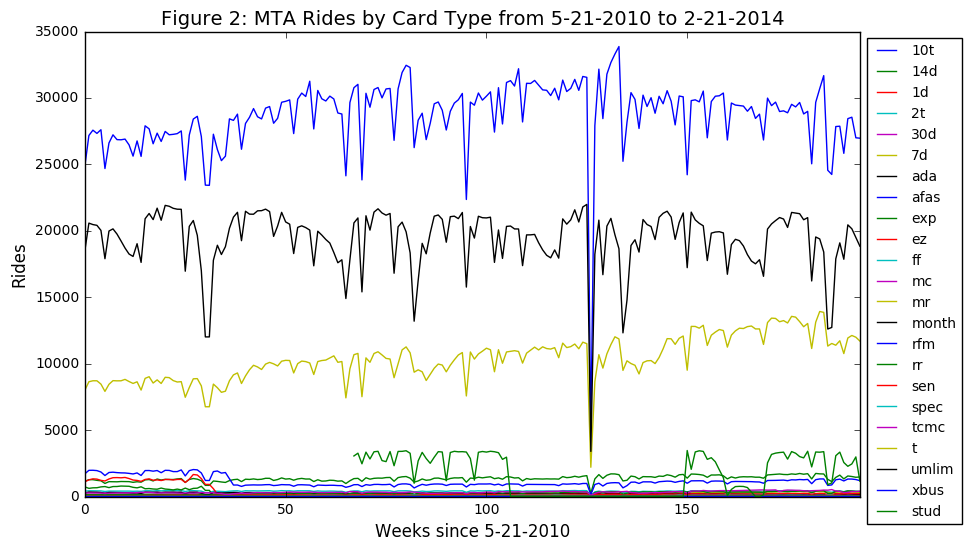

In [498]:
cardtype.plot(figsize=(10,6))
pl.xlabel("Weeks since 5-21-2010", fontsize=12)
pl.ylabel("Rides", fontsize = 12)
pl.title("Figure 2: MTA Rides by Card Type from 5-21-2010 to 2-21-2014", fontsize = 14)
pl.legend(loc = 'upper left', bbox_to_anchor=(1, 1), fontsize = 10)
#pl.legend(fontsize=12, bbox_to_anchor = (1,1))

### Figure 2:

This plot shows number of rides per week from 5-21-2010 to 2-21-2014 by each card type, as shown in the legend. With so much information in one graph, it is difficult to detect trends in each dataset. Those with smaller numbers of rides appear flat but may show trends when looked at individually. 

In [458]:
# Finding mean of first 10 weeks for each card type
first_ten = pd.DataFrame.mean(cardtype.head(10))
first_ten

10t      26679.372193
14d       1152.538560
1d         107.820192
2t         411.905844
30d        103.637043
7d        8501.107718
ada      19700.974263
afas        23.728452
exp        707.624325
ez        1294.748398
ff          89.142768
mc         284.984963
mr           0.012525
month      296.671208
rfm       1823.782062
rr         139.405325
sen         67.433918
spec         0.980480
tcmc       261.157398
t           45.660588
umlim       14.317519
xbus         1.028908
stud              NaN
dtype: float64

In [459]:
# Finding mean of last 10 weeks for each card type
last_ten = pd.DataFrame.mean(cardtype.tail(10))
last_ten

10t      27298.114440
14d       1444.964244
1d         119.985886
2t         385.146605
30d        107.265128
7d       11830.198748
ada      17751.245660
afas         0.004976
exp          0.007572
ez           0.001947
ff          73.090842
mc         346.310759
mr         311.031162
month      171.923428
rfm       1186.308498
rr         361.968382
sen        196.458495
spec        68.936149
tcmc       400.677851
t           46.704915
umlim       11.598837
xbus         1.712807
stud      2311.997455
dtype: float64

In [460]:
# Finding ration of last to first ten weeks for each card type
ratio = last_ten / first_ten
ratio

10t          1.023192
14d          1.253723
1d           1.112833
2t           0.935036
30d          1.035008
7d           1.391607
ada          0.901034
afas         0.000210
exp          0.000011
ez           0.000002
ff           0.819930
mc           1.215190
mr       24832.489860
month        0.579508
rfm          0.650466
rr           2.596518
sen          2.913348
spec        70.308565
tcmc         1.534239
t            1.022872
umlim        0.810115
xbus         1.664684
stud              NaN
dtype: float64

In [461]:
# Sorting the above series to find the highest ratios and lowest ratios, 
# correlating to largest increase and decrease of data, respectively. 
pd.Series.order(ratio)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


ez           0.000002
exp          0.000011
afas         0.000210
month        0.579508
rfm          0.650466
umlim        0.810115
ff           0.819930
ada          0.901034
2t           0.935036
t            1.022872
10t          1.023192
30d          1.035008
1d           1.112833
mc           1.215190
14d          1.253723
7d           1.391607
tcmc         1.534239
xbus         1.664684
rr           2.596518
sen          2.913348
spec        70.308565
mr       24832.489860
stud              NaN
dtype: float64

## From the above ratios: 

### Steepest decreases: ez, exp, afas, month
### Steepest increases: mr, spec, sen, rr

## Task 2, Part A:
### Figures 3-6 below examine the steepest decreases to determine which show steady trends

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Se

rides
 0    1108.294372
1    1253.845987
2    1329.453564
3    1309.438445
4    1214.323276
Name: ez, dtype: float64 
 189    0.000000
190    0.002165
191    0.006494
192    0.000000
193    0.002165
Name: ez, dtype: float64
rolling mean of rides
 9     1294.748398
10    1327.363430
11    1337.058572
12    1328.000313
13    1317.998585
Name: ez, dtype: float64 
 189    0.001944
190    0.001728
191    0.002161
192    0.002161
193    0.001947
Name: ez, dtype: float64


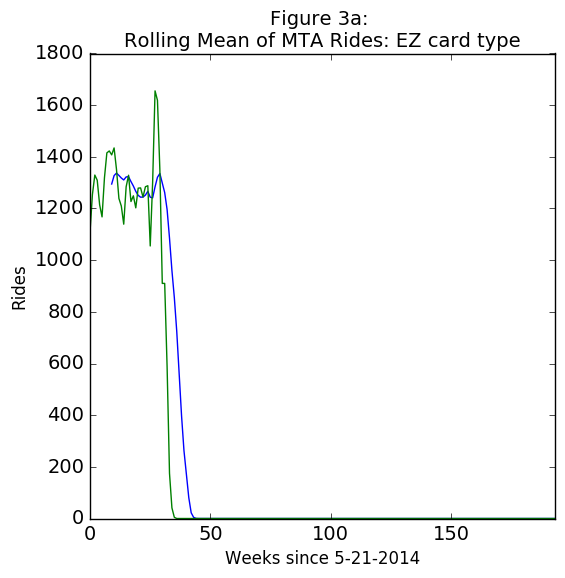

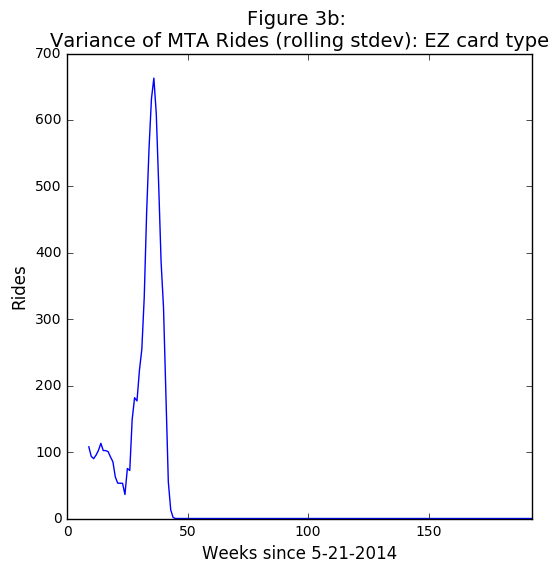

In [506]:
fig = pl.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(cardtype['ez'], 10).plot(fontsize=14)
ax.set_title("Figure 3a: \nRolling Mean of MTA Rides: EZ card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)
ax.plot(cardtype['ez'], label="original")
pl.figure()
ax = pd.rolling_std(cardtype['ez'], 10).plot(figsize=(6,6))
ax.set_title("Figure 3b: \nVariance of MTA Rides (rolling stdev): EZ card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)

print ("rides\n", 
       cardtype['ez'].dropna().head(), "\n", 
       cardtype['ez'].dropna().tail())

print ("rolling mean of rides\n", 
       pd.rolling_mean(cardtype['ez'], 10).dropna().head(), "\n", 
       pd.rolling_mean(cardtype['ez'], 10).dropna().tail())

### Figure 3:

Figure 3a shows the rolling mean for MTA rides of the ez card type. The green line is the original data whereas the blue shows the rolling, smoothed mean. There is a sudden drop around week 30, supported by the spike in variance in Figure 3b. This trend then remains at or near zero for the remaining weeks, suggesting the card type was expired or decreased in popularity. Thus, this does not represent a **steady/constant** trend downwards in rides, and I will thus go to to examine the next smallest ratio. 

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Se

rides
 0    721.205628
1    613.351410
2    652.328294
3    659.855292
4    723.663793
Name: exp, dtype: float64 
 189    0.004329
190    0.012987
191    0.000000
192    0.010799
193    0.006494
Name: exp, dtype: float64
rolling mean of rides
 9     707.624325
10    713.034564
11    728.619898
12    732.418896
13    731.523216
Name: exp, dtype: float64 
 189    0.007350
190    0.007785
191    0.007352
192    0.007784
193    0.007572
Name: exp, dtype: float64


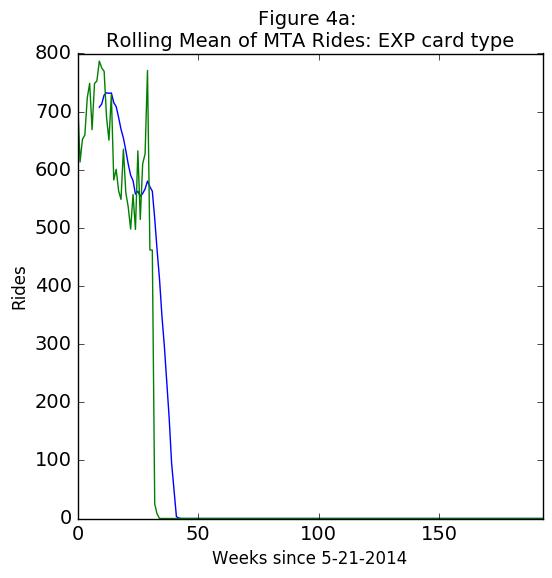

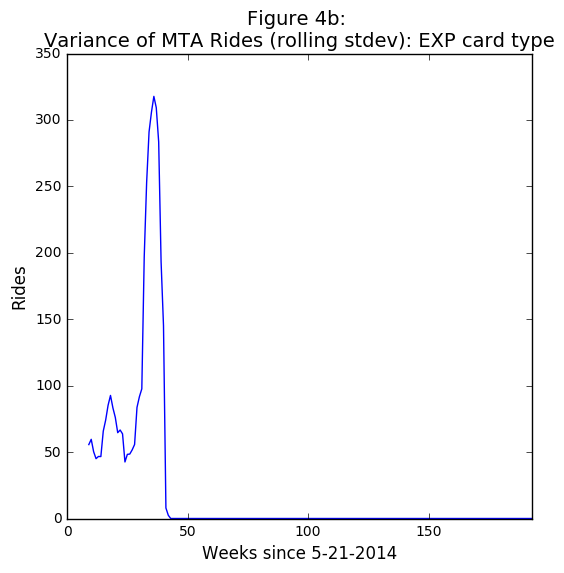

In [507]:
fig = pl.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(cardtype['exp'], 10).plot(fontsize=14)
ax.set_title("Figure 4a: \nRolling Mean of MTA Rides: EXP card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)
ax.plot(cardtype['exp'], label="original")
pl.figure()
ax = pd.rolling_std(cardtype['exp'], 10).plot(figsize=(6,6))
ax.set_title("Figure 4b: \nVariance of MTA Rides (rolling stdev): EXP card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)

print ("rides\n", 
       cardtype['exp'].dropna().head(), "\n", 
       cardtype['exp'].dropna().tail())

print ("rolling mean of rides\n", 
       pd.rolling_mean(cardtype['exp'], 10).dropna().head(), "\n", 
       pd.rolling_mean(cardtype['exp'], 10).dropna().tail())

### Figure 4:

Figure 4a shows the rolling mean for MTA rides of the exp card type. The green line is the original data whereas the blue shows the rolling, smoothed mean. There is also a sudden drop here around week 30-45, supported by the spike in variance in Figure 4b. This trend then remains at or near zero for the remaining weeks, suggesting the card type was expired or decreased in popularity. Thus, this does not represent a **steady/constant** trend downwards in rides, and I will thus go to to examine the next smallest ratio. 

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()


rides
 0    21.781385
1    25.698482
2    26.516199
3    24.235421
4    22.661638
Name: afas, dtype: float64 
 189    0.004329
190    0.004329
191    0.004329
192    0.006479
193    0.000000
Name: afas, dtype: float64
rolling mean of rides
 9     23.728452
10    23.898687
11    23.634442
12    23.155725
13    22.842118
Name: afas, dtype: float64 
 189    0.005192
190    0.005192
191    0.004760
192    0.005192
193    0.004976
Name: afas, dtype: float64


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()


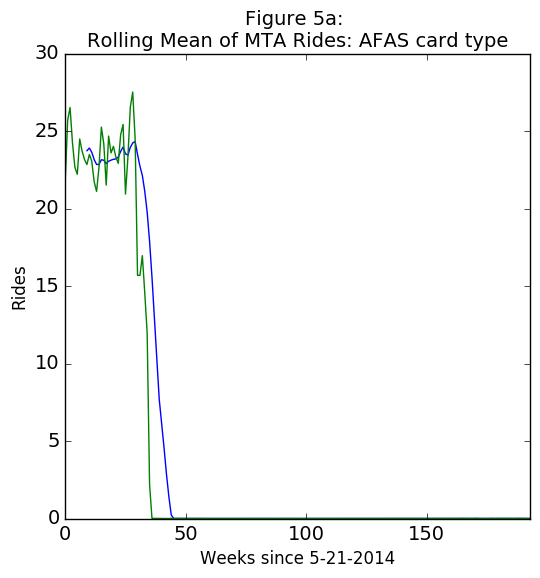

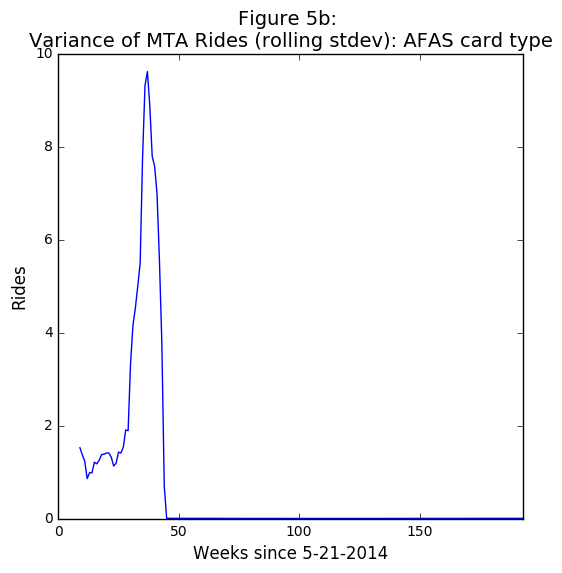

In [508]:
fig = pl.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(cardtype['afas'], 10).plot(fontsize=14)
ax.set_title("Figure 5a: \nRolling Mean of MTA Rides: AFAS card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)
ax.plot(cardtype['afas'], label="original")
pl.figure()
ax = pd.rolling_std(cardtype['afas'], 10).plot(figsize=(6,6))
ax.set_title("Figure 5b: \nVariance of MTA Rides (rolling stdev): AFAS card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)

print ("rides\n", 
       cardtype['afas'].dropna().head(), "\n", 
       cardtype['afas'].dropna().tail())

print ("rolling mean of rides\n", 
       pd.rolling_mean(cardtype['afas'], 10).dropna().head(), "\n", 
       pd.rolling_mean(cardtype['afas'], 10).dropna().tail())

### Figure 5:

Figure 5a shows the rolling mean for MTA rides of the afas card type. The green line is the original data whereas the blue shows the rolling, smoothed mean. There is also a sudden drop here around week 30-40, supported by the spike in variance in Figure 5b. This trend then remains at or near zero for the remaining weeks, suggesting the card type was expired or decreased in popularity. Thus, this does not represent a **steady/constant** trend downwards in rides, and I will thus go to to examine the next smallest ratio. 

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Se

rides
 0    266.523810
1    329.605206
2    327.295896
3    317.697624
4    297.172414
Name: month, dtype: float64 
 189    160.158009
190    211.748918
191    188.978355
192    178.688985
193    160.761905
Name: month, dtype: float64
rolling mean of rides
 9     296.671208
10    299.190627
11    294.137434
12    287.464404
13    283.065052
Name: month, dtype: float64 
 189    172.866744
190    172.996711
191    179.062079
192    176.575686
193    171.923428
Name: month, dtype: float64


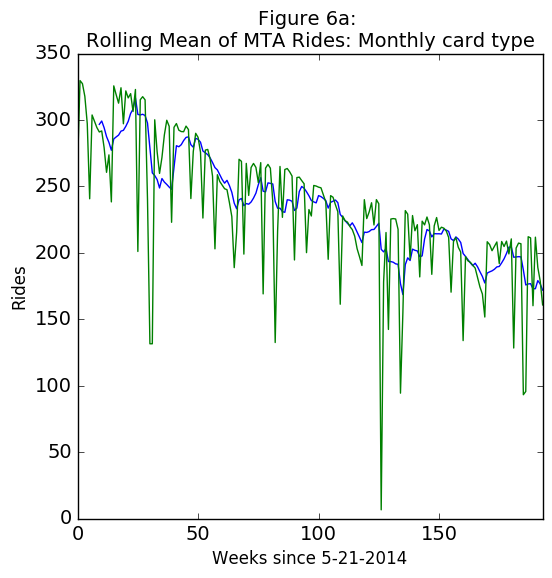

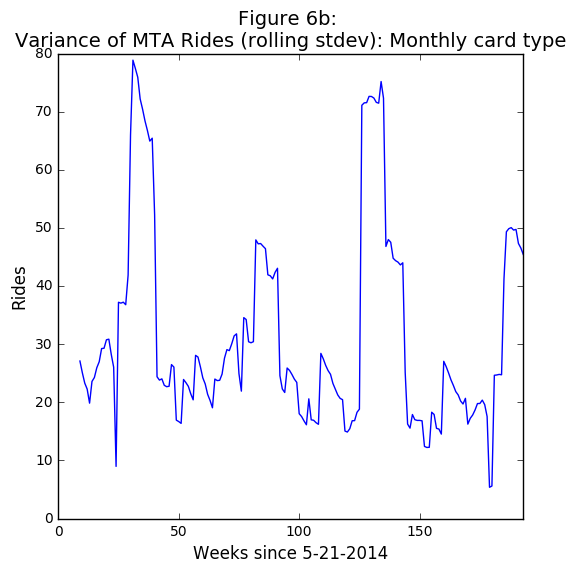

In [509]:
fig = pl.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(cardtype['month'], 10).plot(fontsize=14)
ax.set_title("Figure 6a: \nRolling Mean of MTA Rides: Monthly card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)
ax.plot(cardtype['month'], label="original")
pl.figure()
ax = pd.rolling_std(cardtype['month'], 10).plot(figsize=(6,6))
ax.set_title("Figure 6b: \nVariance of MTA Rides (rolling stdev): Monthly card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)

print ("rides\n", 
       cardtype['month'].dropna().head(), "\n", 
       cardtype['month'].dropna().tail())

print ("rolling mean of rides\n", 
       pd.rolling_mean(cardtype['month'], 10).dropna().head(), "\n", 
       pd.rolling_mean(cardtype['month'], 10).dropna().tail())

### Figure 6:

Figure 6a shows the rolling mean for MTA rides of the monthly card type. The green line is the original data whereas the blue shows the rolling, smoothed mean. Unlike the previous plots, the rolling mean shows a fairly constant/steady downward trend over this time period, the small spikes likely reflecting  period trends since they remain fairly consistent. 

## Task 2, Part A Conclusion:

### Monthly MTA passes decreased at the highest rate, and at a constant/steady pace, among these 23 card types over this time period.

## Task 2, Part B:
### Figures 7-9 below examine the steepest increases to determine which show steady trends

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Se

rides
 0    0.008658
1    0.006508
2    0.025918
3    0.012959
4    0.019397
Name: mr, dtype: float64 
 189    273.430736
190    313.303030
191    330.874459
192    308.431965
193    316.781385
Name: mr, dtype: float64
rolling mean of rides
 9     0.012525
10    0.012093
11    0.012951
12    0.011219
13    0.011004
Name: mr, dtype: float64 
 189    323.585009
190    318.988962
191    322.085715
192    314.617032
193    311.031162
Name: mr, dtype: float64


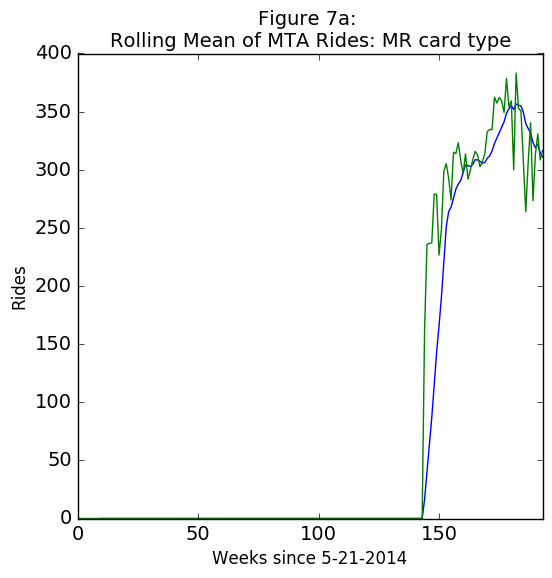

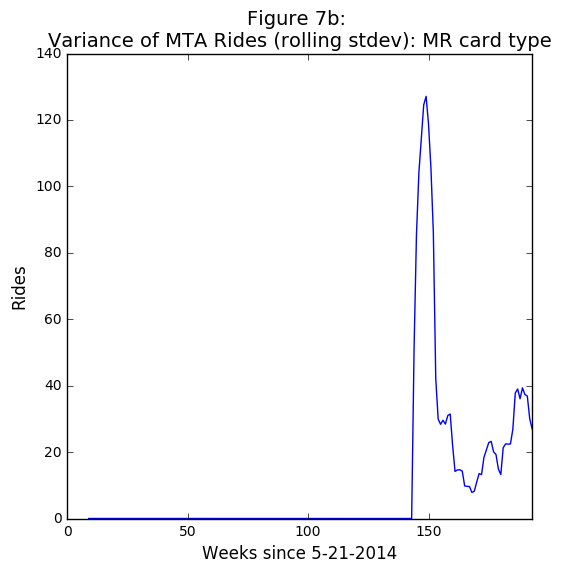

In [510]:
fig = pl.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(cardtype['mr'], 10).plot(fontsize=14)
ax.set_title("Figure 7a: \nRolling Mean of MTA Rides: MR card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)
ax.plot(cardtype['mr'], label="original")
pl.figure()
ax = pd.rolling_std(cardtype['mr'], 10).plot(figsize=(6,6))
ax.set_title("Figure 7b: \nVariance of MTA Rides (rolling stdev): MR card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)

print ("rides\n", 
       cardtype['mr'].dropna().head(), "\n", 
       cardtype['mr'].dropna().tail())

print ("rolling mean of rides\n", 
       pd.rolling_mean(cardtype['mr'], 10).dropna().head(), "\n", 
       pd.rolling_mean(cardtype['mr'], 10).dropna().tail())

### Figure 7:

Figure 7a shows the rolling mean for MTA rides of the mr card type. The green line is the original data whereas the blue shows the rolling, smoothed mean. Here we see a sudden increase in rides around week 145-155, supported by the spike in variance in Figure 7b. This trend was at zero before, suggesting the card type was introduced around week 145 and thus surged in popularity until reaching a steady rate. Thus, this does not represent a **steady/constant** trend upwards in rides, and I will thus go to to examine the next largest ratio. 

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Se

rides
 0    0.00000
1    0.00000
2    0.00000
3    0.00000
4    0.37931
Name: spec, dtype: float64 
 189    54.770563
190    62.415584
191    66.844156
192    53.352052
193    57.378788
Name: spec, dtype: float64
rolling mean of rides
 9      0.980480
10     3.772020
11     6.762753
12     9.062323
13    11.907031
Name: spec, dtype: float64 
 189    74.566643
190    73.883796
191    73.180549
192    71.003227
193    68.936149
Name: spec, dtype: float64


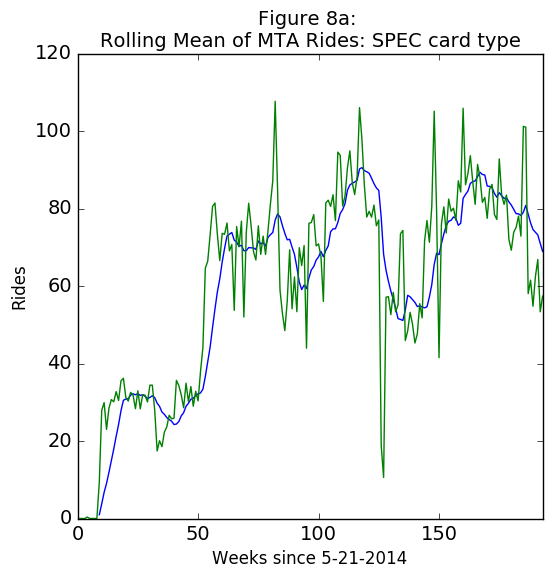

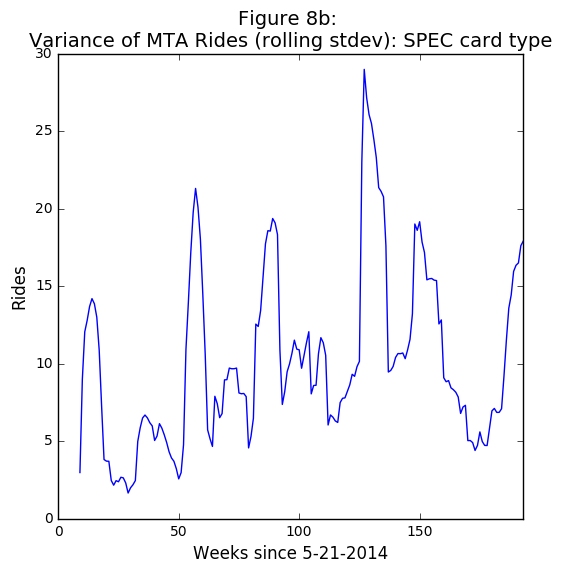

In [511]:
fig = pl.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(cardtype['spec'], 10).plot(fontsize=14)
ax.set_title("Figure 8a: \nRolling Mean of MTA Rides: SPEC card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)
ax.plot(cardtype['spec'], label="original")
pl.figure()
ax = pd.rolling_std(cardtype['spec'], 10).plot(figsize=(6,6))
ax.set_title("Figure 8b: \nVariance of MTA Rides (rolling stdev): SPEC card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)

print ("rides\n", 
       cardtype['spec'].dropna().head(), "\n", 
       cardtype['spec'].dropna().tail())

print ("rolling mean of rides\n", 
       pd.rolling_mean(cardtype['spec'], 10).dropna().head(), "\n", 
       pd.rolling_mean(cardtype['spec'], 10).dropna().tail())

### Figure 8:

Figure 8a shows the rolling mean for MTA rides of the spec card type. The green line is the original data whereas the blue shows the rolling, smoothed mean. This plot shows a more consistent increasee than the mr plot, but the there are still some large peaks and drops as the data moves upwards, supported by the large peaks in variance in Figure 8b. Thus, I will examinne the next largest ratio to see if it has a more steady trend upwards. 

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Se

rides
 0    61.084416
1    70.136659
2    70.449244
3    69.987041
4    68.821121
Name: sen, dtype: float64 
 189    193.406926
190    225.023810
191    221.047619
192    218.295896
193    209.712121
Name: sen, dtype: float64
rolling mean of rides
 9     67.433918
10    68.135455
11    67.876099
12    67.622572
13    67.826892
Name: sen, dtype: float64 
 189    191.910624
190    192.047347
191    198.035442
192    198.289654
193    196.458495
Name: sen, dtype: float64


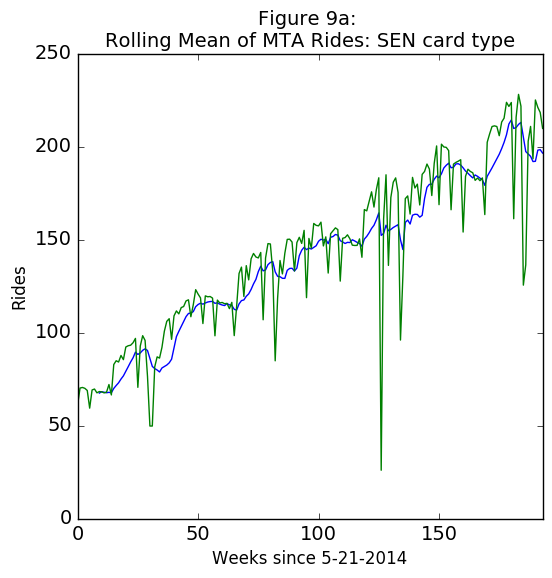

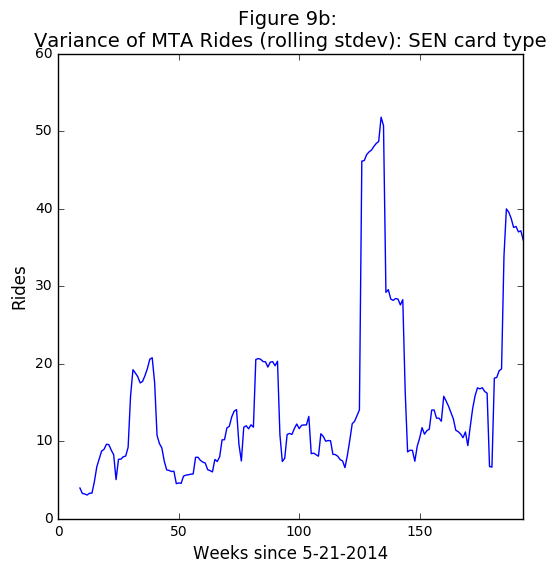

In [512]:
fig = pl.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(cardtype['sen'], 10).plot(fontsize=14)
ax.set_title("Figure 9a: \nRolling Mean of MTA Rides: SEN card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)
ax.plot(cardtype['sen'], label="original")
pl.figure()
ax = pd.rolling_std(cardtype['sen'], 10).plot(figsize=(6,6))
ax.set_title("Figure 9b: \nVariance of MTA Rides (rolling stdev): SEN card type", fontsize=14)
pl.xlabel("Weeks since 5-21-2014", fontsize=12)
pl.ylabel("Rides", fontsize=12)

print ("rides\n", 
       cardtype['sen'].dropna().head(), "\n", 
       cardtype['sen'].dropna().tail())

print ("rolling mean of rides\n", 
       pd.rolling_mean(cardtype['sen'], 10).dropna().head(), "\n", 
       pd.rolling_mean(cardtype['sen'], 10).dropna().tail())

### Figure 9:

Figure 9a shows the rolling mean for MTA rides of the monthly card type. The green line is the original data whereas the blue shows the rolling, smoothed mean. Unlike the previous plots, the rolling mean shows a fairly constant/steady upwards trend over this time period, the small spikes likely reflecting period trends since they remain fairly consistent. 

## Task 2, Part B Conclusion:

### Senior MTA passes increased at the highest rate, **and** at a constant/steady pace, among these 23 card types over this time period.

## Task 2 Overall Conclusion:

### Monthly passes use decreased the most (at a steady rate), and Senior passes use increased the most (at a steady rate). 

# Task 3: Periodic trend

Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [411]:
mta_station = np.nansum(mtaRides, axis = 1)
print (mta_station.shape)

(600, 194)


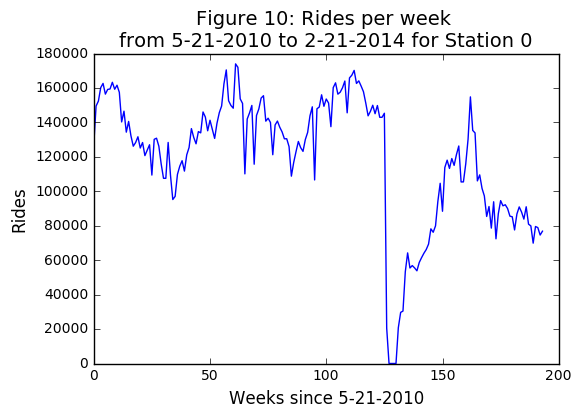

In [515]:
# Plotting out the first station
pl.plot(mta_station[0])
pl.title("Figure 10: Rides per week \nfrom 5-21-2010 to 2-21-2014 for Station 0", fontsize = 14)
pl.xlabel("Weeks since 5-21-2010", fontsize = 12)
pl.ylabel("Rides", fontsize = 12)

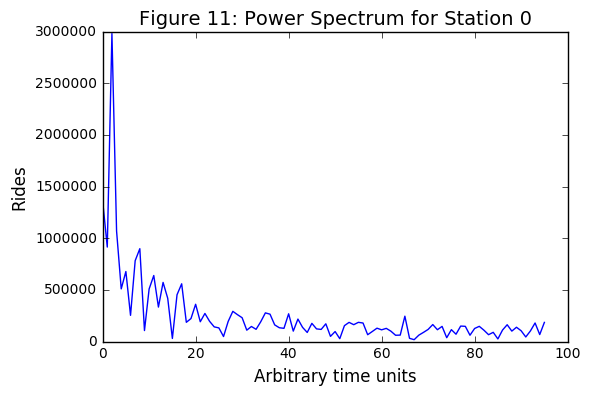

In [517]:
# Power spectrum plot for station 0
pl.plot(np.abs(np.fft.rfft(mta_station[0]))[2:])
pl.title("Figure 11: Power Spectrum for Station 0", fontsize = 14)
pl.xlabel("Arbitrary time units", fontsize = 12)
pl.ylabel("Rides", fontsize = 12)

0.019230769230769232
[ 0.01030928  0.01546392  0.02061856  0.0257732   0.03092784  0.03608247
  0.04123711  0.04639175  0.05154639  0.05670103  0.06185567  0.06701031
  0.07216495  0.07731959  0.08247423  0.08762887  0.09278351  0.09793814
  0.10309278  0.10824742  0.11340206  0.1185567   0.12371134  0.12886598
  0.13402062  0.13917526  0.1443299   0.14948454  0.15463918  0.15979381
  0.16494845  0.17010309  0.17525773  0.18041237  0.18556701  0.19072165
  0.19587629  0.20103093  0.20618557  0.21134021  0.21649485  0.22164948
  0.22680412  0.23195876  0.2371134   0.24226804  0.24742268  0.25257732
  0.25773196  0.2628866   0.26804124  0.27319588  0.27835052  0.28350515
  0.28865979  0.29381443  0.29896907  0.30412371  0.30927835  0.31443299
  0.31958763  0.32474227  0.32989691  0.33505155  0.34020619  0.34536082
  0.35051546  0.3556701   0.36082474  0.36597938  0.37113402  0.37628866
  0.3814433   0.38659794  0.39175258  0.39690722  0.40206186  0.40721649
  0.41237113  0.41752577  0.42

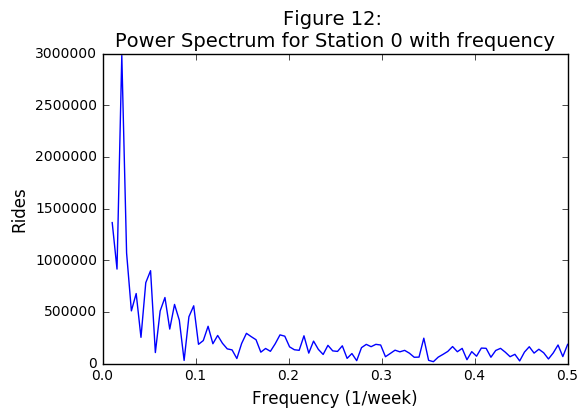

In [519]:
pl.plot(np.fft.rfftfreq(194)[2:], np.abs(np.fft.rfft(mta_station[0])[2:]))

# Below will print the annual frequency value
print(1. / 52.)

# Below will print all possible week frequencies
print(np.fft.rfftfreq(194)[2:])
pl.title("Figure 12: \nPower Spectrum for Station 0 with frequency", fontsize = 14)
pl.xlabel("Frequency (1/week)", fontsize = 12)
pl.ylabel("Rides", fontsize = 12)

### Figure 12:

Figure 12 shows the power spectrum for station 0 with the frequencies along the x-axis (1/week). The high peak near the beginning can be ignored, since the points are compared to themselves and become infinity. 

### From the above printed information, we see that the annual frequency (1/52, which is 0.19) is closest to the 4th place in the resulting frequency array (0.20). Thus, it is the 4th index that should be used to create power spectrums for the data for annual periodicities.

In [284]:
# Checking above conclusion, finding number of periods
periods = len(mta_station[1]) / 52
periods

3.730769230769231

### The above rounds to 4, supporting our choice of the 4th index (four periods). 

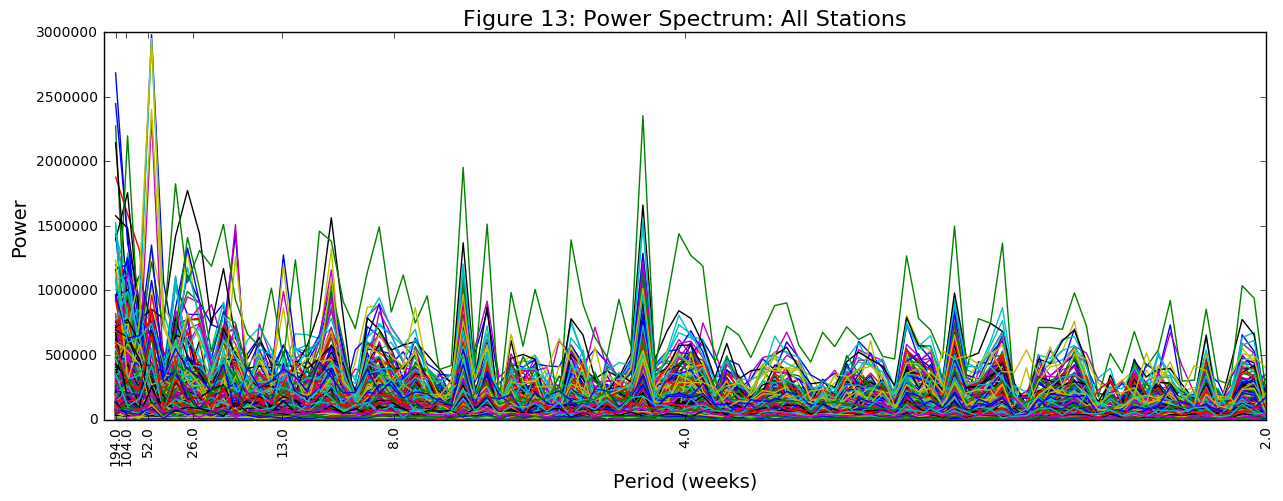

In [520]:
N = len(mta_station[0])
allperiods = [1./194, 1./104, 1./52, 1./26, 1./13, 1./8, 1./4, 1./2]
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
for i in range(0,len(mta_station)):
    f = np.abs(np.fft.rfft(mta_station[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    
ax.set_xticks(x_labels)    
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)
plt.xlabel("Period (weeks)", fontsize = 14)
plt.ylabel("Power", fontsize = 14)
plt.title("Figure 13: Power Spectrum: All Stations", fontsize = 16)

## Figure 13:

Figure 13 shows the power spectrums for all 600 stations. There are some clear power peaks here, but without futher analysis it is impossible to pick out the highest ones for the annual period (52 weeks).

In [423]:
# Absolute value of Fourier gives power
frequency = np.abs(np.fft.rfft(mta_station))

In [424]:
# Creating a loop to calculate power for each station
annual_power = []
for i in range(0,len(frequency)):
    weekly = frequency[i][4]
    annual_power.append(weekly)

In [521]:
# Sorting powers for each station to find stations with 4 highest periodicities.
df = pd.DataFrame(annual_power, columns=['Annual_Periodicity'])
df.sort_values(by=['Annual_Periodicity'],inplace = True)
df.tail(4)

,Annual_Periodicity
327,2.402219e+06
150,2.931896e+06
194,2.950389e+06
0,2.980161e+06


### The 4 stations with the highest annual periodicity are stations 0, 194, 150, and 327. 

In [472]:
dates_plot = pd.date_range(start = '5/21/2010', periods = 194, freq = 'W-FRI')
dates_plot.shape

(194,)

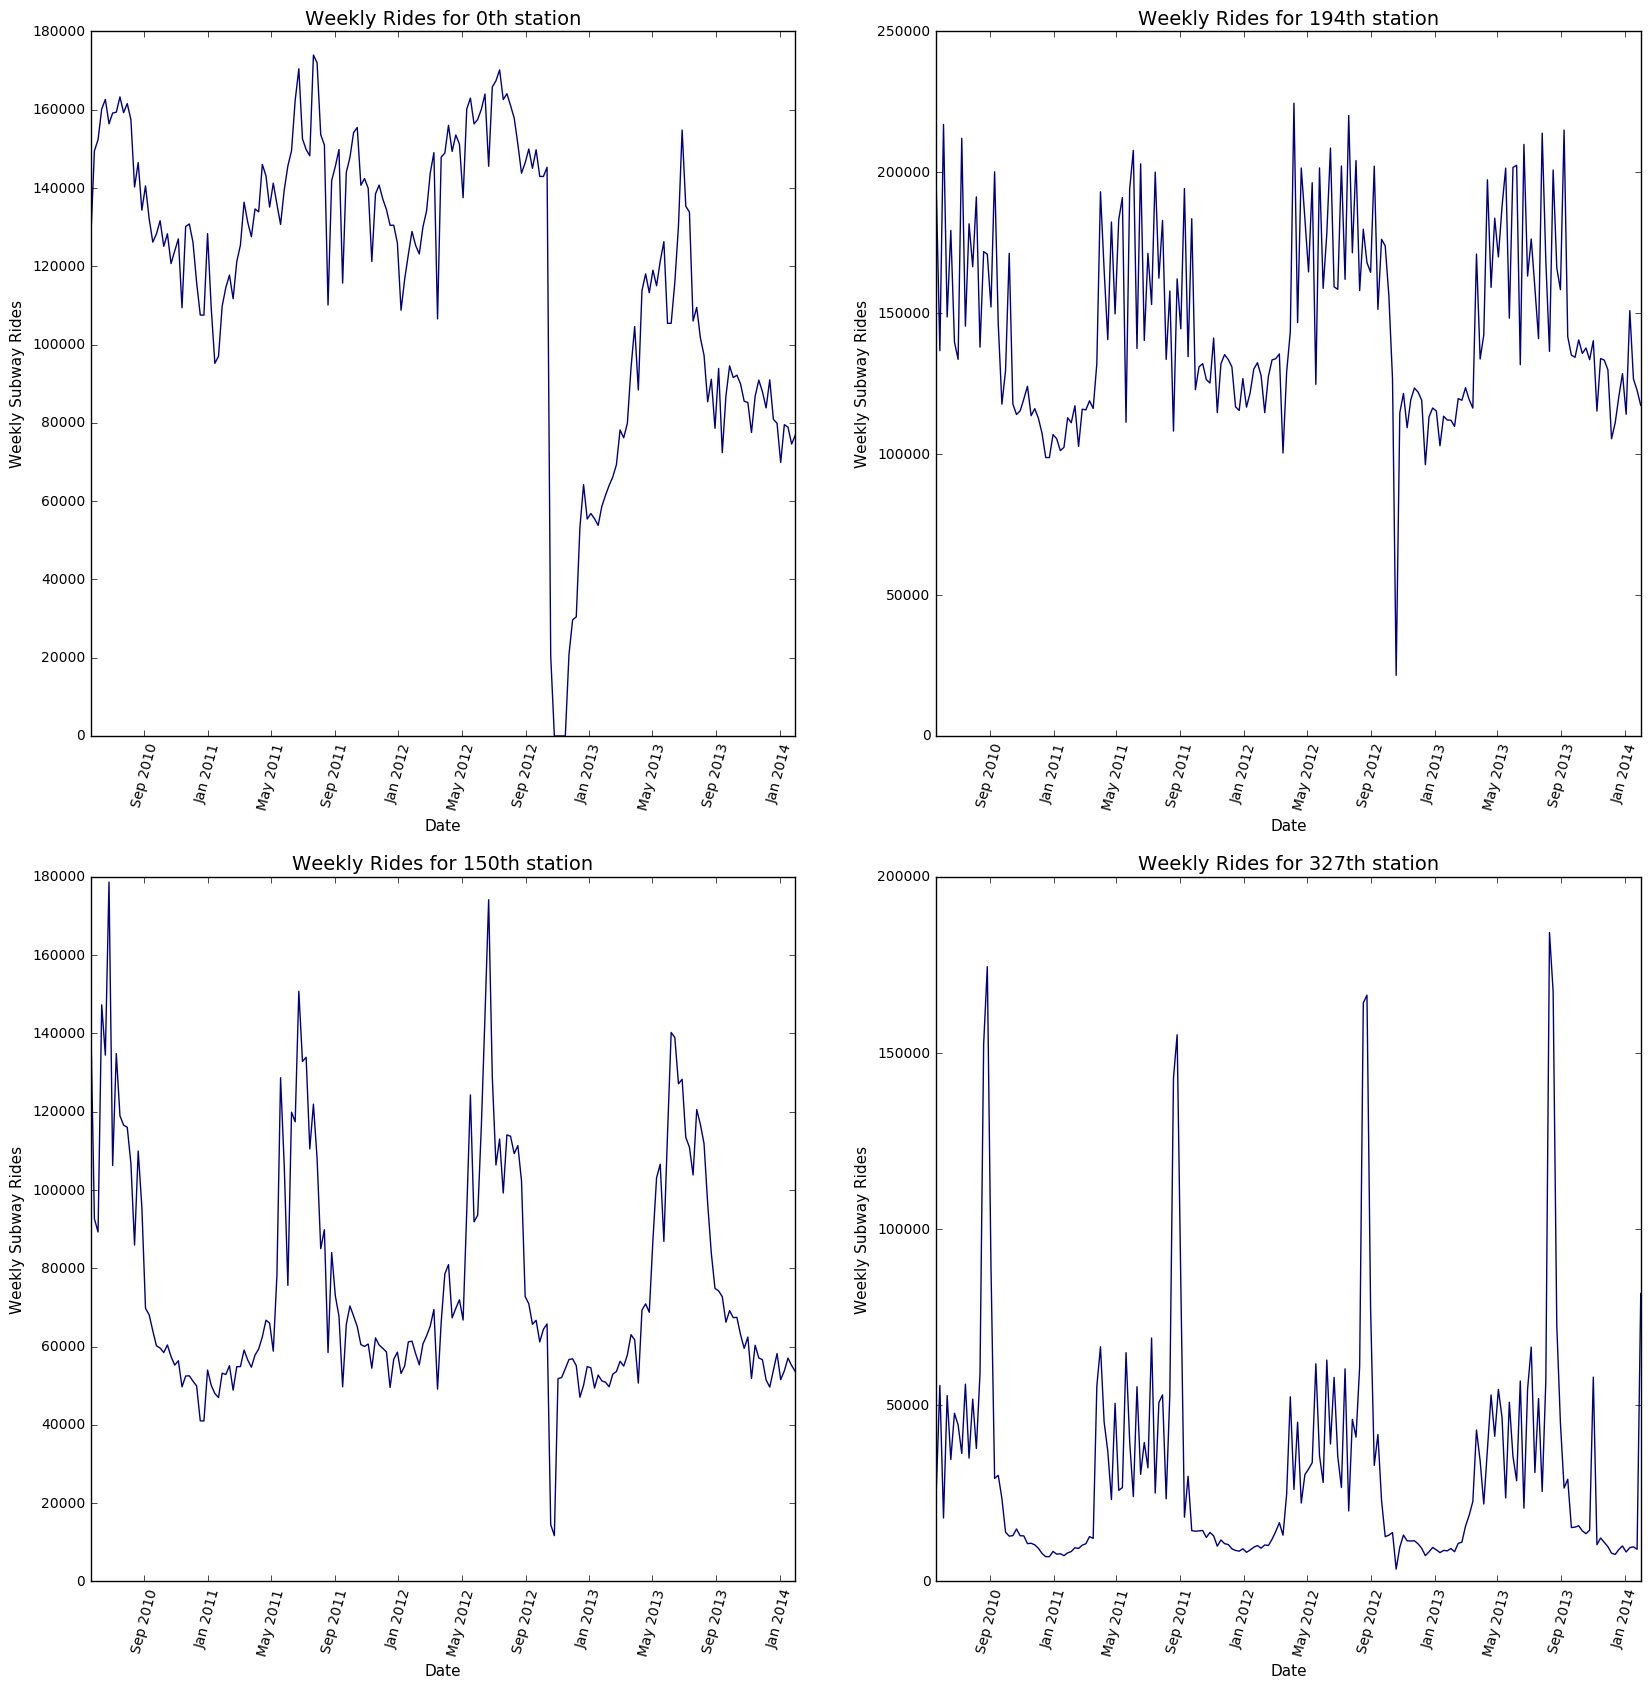

In [474]:
# Plotting annual periodicity for these 4 stations
plt.figure(figsize=(20,20)) 
for i,stat in enumerate([0, 194, 150, 327]):
    plt.subplot(2,2,i+1)
    plt.plot(dates_plot, mta_station[stat], 'navy')
    plt.ylabel('Weekly Subway Rides', size=11)
    plt.xlabel('Date', size=11)
    plt.xticks(rotation=75)
    plt.title(('Weekly Rides for %sth station'%stat), size = 14)

### Figure 13 (above):

These four plots show the periodic trends for the top 4 stations with the highest periodicities. There are clear increases in ridership during the summer months, and decreases in ridership during the winter months.  

## Task 3 Conclusion:

### The increase of ridership during the summer and decrease during the winter can be easily explained by one phenomenom: tourism. Tourists flock to the city during the summer months, flooding the train systems and increasing ridership. This trend is seen in Figure 13 as a repeating periodity over each of these four stations. 